In [7]:
import json
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score,recall_score


In [8]:
f = open('test_results_sources_1_100_icp.json') 
data = json.load(f)
data

{'Hatchback-1589078380188916-2.pcd': {'tests': {'Hatchback': {'fitness_score': 0.25566523937156177,
    'has_converged': True},
   'Jeep': {'fitness_score': 0.23130069158010128, 'has_converged': True},
   'SUV': {'fitness_score': 0.3230201254859028, 'has_converged': True},
   'Sedan': {'fitness_score': 0.27572220773594563, 'has_converged': True}},
  'true_label': 'Hatchback'},
 'Hatchback-1589078380388915-2.pcd': {'tests': {'Hatchback': {'fitness_score': 0.33758437321827434,
    'has_converged': True},
   'Jeep': {'fitness_score': 0.33906355955918105, 'has_converged': True},
   'SUV': {'fitness_score': 0.4662358725415858, 'has_converged': True},
   'Sedan': {'fitness_score': 0.37916996182906715, 'has_converged': True}},
  'true_label': 'Hatchback'},
 'Hatchback-1589078380448915-2.pcd': {'tests': {'Hatchback': {'fitness_score': 0.24739247034405898,
    'has_converged': True},
   'Jeep': {'fitness_score': 0.22385694468643225, 'has_converged': True},
   'SUV': {'fitness_score': 0.32594825

In [9]:
labels = ['Hatchback','Jeep', 'SUV', 'Sedan']

In [10]:

predicted = []
true_label = []

for line in data:
    collect = []
    for test_result in data[line]:
        if test_result == 'tests':
            for label in labels:
                collect.append((data[line][test_result][label]['fitness_score'],label))
    collect.sort()
    if collect:
        predicted.append(collect[0][1])
        true_label.append(data[line]['true_label'])
        
cm =confusion_matrix(true_label, predicted, labels=labels)
cm

array([[ 69, 142,   0,   0],
       [156, 528,  16,   6],
       [142, 163,  50,   1],
       [361,  89,   3,  54]])

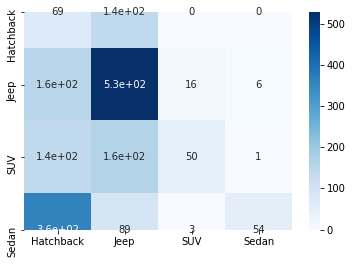

In [11]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                      columns = [i for i in labels])

sns.heatmap(df_cm,annot=True,cmap="Blues")

In [12]:

print("recall :", recall_score(true_label, predicted, labels,average=None))
print("precision :", precision_score(true_label, predicted, labels,average=None))

recall : [0.32701422 0.74787535 0.14044944 0.10650888]
precision : [0.09478022 0.57266811 0.72463768 0.8852459 ]
